<a href="https://colab.research.google.com/github/hwangjunseong/my-first-website/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9Dteam_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
#데이터 모으기

train = pd.read_csv("/content/fashion-mnist_train.csv")
test = pd.read_csv("/content/fashion-mnist_test.csv")

train_data = np.array(train, dtype='float32')
test_data = np.array(test, dtype='float32')
# x_train = train_data[:,1:]/255
# y_train = train_data[:,0]
# x_test= test_data[:,1:]/255
# y_test=test_data[:,0]

In [2]:
print(train.shape)
# print(train.tail())
print(test.shape)

(60000, 785)
(10000, 785)


In [ ]:
class_names=['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
# train.tail()
# has_nan = np.isnan(train_data).any()
has_nan = np.isnan(test_data).any()

if has_nan:
    print("훈련 데이터에 NaN이 있습니다.")
else:
    print("훈련 데이터에 NaN이 없습니다.")

훈련 데이터에 NaN이 없습니다.


In [3]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

#데이터 분할
# x에는 이미지 데이터를, y에는 클래스 레이블을 저장

X_train = train_data[:,1:]
y_train = train_data[:,0]
X_test= test_data[:,1:]
y_test=test_data[:,0]

print(X_train)
print(y_train)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[2. 9. 6. ... 8. 8. 7.]


In [4]:
from sklearn.preprocessing import MinMaxScaler
#train된 학습데이터를 그대로 사용 test는 학습x
#정규화, 모든 특성이 [0, 1] 범위로 스케일링
scaler_minmax=MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)
# print(X_scaled_minmax_train.shape)
print(X_scaled_minmax_train.mean())
# print(X_scaled_minmax_test)

0.28613493


In [5]:
from sklearn.decomposition import PCA
# PCA 모델 생성
pca = PCA(n_components=50)  # 2차원으로 차원 축소
# 주성분 1열 2열 각각 원점으로부터 x축으로 1열만큼 y축으로 2열만큼 이동한거 나타냄
# PCA를 정규화된 특성 데이터에 적용하여 차원 축소된 데이터 얻기
X_reduced = pca.fit_transform(X_scaled_minmax_train)
# print(X_reduced.shape)
# print(X_reduced.mean())
# print(X_reduced.std())
print(X_reduced)
# print(X_reduced.max())
# print(X_reduced.min())


[[ 3.68579221e+00  4.96106577e+00 -5.07120602e-02 ...  1.52687710e-02
   1.61198542e-01  2.63906062e-01]
 [-4.37652302e+00  3.86022258e+00 -1.94807768e+00 ...  5.92562079e-01
  -3.51948850e-02 -8.89196754e-01]
 [ 7.26511574e+00  1.56888115e+00  2.31514740e+00 ...  1.29552722e-01
   1.22106925e-01 -4.64195944e-03]
 ...
 [ 2.18171668e+00  4.51602608e-01 -5.56140542e-01 ... -4.89184618e-01
  -5.67988276e-01 -4.48558152e-01]
 [ 1.46950781e+00  6.06359482e+00 -6.24426365e-01 ...  2.93035656e-01
   3.91295671e-01  2.57014811e-01]
 [-3.57273650e+00  4.77160215e+00 -2.65226603e-01 ... -3.58286560e-01
  -1.96323022e-02 -1.16364159e-01]]


In [ ]:
#모델 종류
#1.분류: 클래스 레이블 또는 범주로 이산적이며, 각 클래스는 서로 독립

#2. 회귀: 출력은 연속적이며, 가능한 값의 범위가 무한

In [ ]:
# 엔트로피 : 놀라는 정도
# Decision 트리: 분리하는 거
# criterion : 어떻게나눌것인가
# CV : 교차검증
# fit: 학습시켜라라
# Grid Search
# from sklearn.model_selection import GridSearchCV
# #넣을 후보들
# param_grid={"criterion":["gini", "entropy", "log_loss"], "max_depth":[2, 4, 8]}
# # 모델
# grid_search=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
# grid_search.fit(X_scaled_minmax_train, y_train)


In [6]:
#앙상블 과정: 약한 학습기 3개로 강한 학습기 1개만듬, 투표방식 :하드보팅
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier





#1.각각의 모델들에 대해서 하이퍼파라미터 튜닝진행
#불순도가 최소가 되도criterion:gini, entropy, log_loss,/ splitter, max_depth, min_samples_split
# logit_model= LogisticRegression(random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
rnf_model = RandomForestClassifier(random_state=42)
svm_model = SVC()

model = VotingClassifier(
    estimators=[('tm', tree_model), ('rf', rnf_model), ('svc', svm_model)], voting='hard')
model.fit(X_reduced, y_train)


VotingClassifier(estimators=[('tm', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC())])

In [8]:
# 새로운 데이터에 앙상블 모델을 적용하여 예측
X_reduced_test = pca.transform(X_scaled_minmax_test)
y_pred = model.predict(X_reduced_test)
print(X_reduced_test)
print(y_pred)

[[ 5.473689   -1.444444   -0.6763911  ... -0.09030402 -0.22099681
  -0.16106799]
 [-0.22672582 -6.0935097  -1.2989526  ... -0.03761518 -0.4629627
  -0.2979505 ]
 [-3.2150507  -0.57257855  3.2893534  ... -0.13825703 -0.42731425
  -0.28882712]
 ...
 [ 1.0813513   3.8956218   0.19061702 ...  0.0952743   0.10148844
  -0.01579022]
 [ 6.1267357   5.187683   -0.13166547 ... -0.30567446  0.12004346
   0.38926074]
 [ 7.662586    0.49614412  1.4223683  ...  0.13725558  0.50644606
  -0.03430937]]
[0. 1. 2. ... 8. 8. 2.]


In [ ]:
print(X_reduced_test.shape)
print(y_pred.shape)
print(y_pred.max())
print(y_pred.min())

(10000, 2)
(10000,)


In [ ]:
#모델 평가
#모델 평가 기준을 정확도->클래스 불균형x->분류(Classification)로 할 것이냐, mse->회귀(Regression) 로 할 것이냐 MSE = (1/n) * Σ(실제 값 - 예측 값)^2, 여기서 n은 샘플 수

In [ ]:
# 예측된 클래스 값을 testResult.txt 파일에 저장
with open("testResult.txt", "w") as f:
    for index, prediction in enumerate(y_pred):
      index_str = f"{index:05d}" #5자리의 길이로 표시하고, 빈 자리는 0으로 채우는 문자열을 생성
      result = f"{index_str} {int(prediction)}"
      f.write(result + "\n")


In [ ]:
with open("testResult.txt", "r") as f:
    content = f.read()

print(content)


00000 0
00001 1
00002 2
00003 4
00004 3
00005 8
00006 8
00007 4
00008 5
00009 0
00010 3
00011 6
00012 2
00013 2
00014 8
00015 5
00016 4
00017 3
00018 4
00019 2
00020 6
00021 4
00022 2
00023 3
00024 7
00025 9
00026 8
00027 6
00028 4
00029 1
00030 7
00031 5
00032 9
00033 9
00034 1
00035 0
00036 9
00037 8
00038 0
00039 0
00040 8
00041 2
00042 9
00043 4
00044 6
00045 0
00046 3
00047 0
00048 4
00049 3
00050 8
00051 4
00052 2
00053 1
00054 0
00055 9
00056 8
00057 2
00058 4
00059 3
00060 4
00061 7
00062 4
00063 4
00064 3
00065 1
00066 0
00067 9
00068 7
00069 6
00070 7
00071 3
00072 6
00073 2
00074 5
00075 7
00076 3
00077 0
00078 1
00079 0
00080 9
00081 0
00082 1
00083 2
00084 2
00085 5
00086 8
00087 4
00088 3
00089 6
00090 1
00091 6
00092 6
00093 4
00094 4
00095 3
00096 2
00097 7
00098 7
00099 3
00100 9
00101 0
00102 9
00103 2
00104 6
00105 4
00106 1
00107 8
00108 4
00109 7
00110 7
00111 5
00112 0
00113 4
00114 7
00115 7
00116 0
00117 6
00118 7
00119 3
00120 2
00121 7
00122 2
00123 6
00124 7


In [9]:
# 데이터 평가
from sklearn.metrics import accuracy_score, classification_report

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도: {accuracy}")

# 분류 보고서 출력
report = classification_report(y_test, y_pred)
print(report)

print('학습 데이터 : {}'.format(model.score(X_reduced,y_train)))
print('평가 데이터 : {}'.format(model.score(X_reduced_test,y_pred)))

정확도: 0.8728
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83      1000
         1.0       0.99      0.97      0.98      1000
         2.0       0.79      0.81      0.80      1000
         3.0       0.88      0.91      0.89      1000
         4.0       0.81      0.84      0.82      1000
         5.0       0.93      0.92      0.93      1000
         6.0       0.75      0.61      0.67      1000
         7.0       0.90      0.91      0.90      1000
         8.0       0.96      0.96      0.96      1000
         9.0       0.92      0.94      0.93      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

학습 데이터 : 1.0
평가 데이터 : 1.0


In [ ]:
print(train.shape)
# print(data.pixel1.value_counts)

(16565, 785)


In [ ]:
# print(data.tail())
print(train.head())


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2       0  ...       0.0       0.0       0.0      30.0      43.0       0.0   
3       0  ...       3.0       0.0       0.0       0.0       0.0       1.0   
4       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       0.0       0.

In [ ]:
# from sklearn.model_selection import train_test_split
# from pandas.core.common import random_state
# from sklearn.impute import SimpleImputer
# # import numpy as np
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

# # random_state는 코드를 실행할 때마다 학습 데이터세트와 테스트 데이터 세트의 데이터가 달라지지않기위한거
# #test_size=0.15 : 테스트 데이터세트를 전체 데이터세트의 15퍼로 설정해라
# #데이터 분할
# # x에는 이미지 데이터를, y에는 클래스 레이블을 저장
# x = train_data.drop('label', axis=1) # 'label' 열을 제외한 모든 열을 x로 저장
#  #NAN을 mean으로 대체
#  #fillNa(0)
# imputer.fit(x)
# X_train = imputer.transform(x)
# y_train = train_data['label']  # 'label' 열을 y로 저장
# print(X_train)
# print(y_train)

# X = test_data.drop('label', axis=1)
# imputer.fit(X)
# X_test = imputer.transform(x)
# y_test = test_data['label']
#훈련데이터와 테스트데이터 분할
# X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 39.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  2.95321178  0.95140063
   0.09013523]]
0        2
1        9
2        6
3        0
4        3
        ..
16560    8
16561    2
16562    2
16563    3
16564    7
Name: label, Length: 16565, dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
#정규화, 모든 특성이 [0, 1] 범위로 스케일링
scaler_minmax=MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)
# print(X_scaled_minmax_train.size)
# print(X_scaled_minmax_test.size)

9739632
3247328


In [ ]:
from sklearn.decomposition import PCA
# PCA 모델 생성
pca = PCA(n_components=2)  # 2차원으로 차원 축소

# PCA를 정규화된 특성 데이터에 적용하여 차원 축소된 데이터 얻기
X_reduced = pca.fit_transform(X_scaled_minmax_train)
print(X_reduced)

[[ 1.11624317 -0.46024653]
 [-4.79887732  5.09229617]
 [ 1.34934255 -2.10198466]
 ...
 [-1.20654703 -2.96806061]
 [ 1.53399422  5.53110149]
 [ 4.49837649 -1.8850533 ]]


In [ ]:
# 모델 선택/학습
# from sklearn.svm import SVC
# model=SVC()
# model.fit(X_train, y_train)

SVC()

In [ ]:
# 모델 선택 > 하이퍼파라미터 튜닝 > 데이터 분석>앙상블
# 데이터 분석에서 비슷한 것끼리 묶고 (잘찾는거끼리)
# b가 하나만 잘하면 하이퍼파라미터 변수를 바꾼다

#앙상블 과정: 약한 학습기 3개로 강한 학습기 1개만듬, 투표방식 :하드보팅
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

# logit_model= LogisticRegression(random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
rnf_model = RandomForestClassifier(random_state=42)
svm_model = SVC()

model = VotingClassifier(
    estimators=[('tm', tree_model), ('rf', rnf_model), ('svc', svm_model)], voting='hard')
model.fit(X_reduced, y_train)


VotingClassifier(estimators=[('tm', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC())])

In [ ]:
# 새로운 데이터에 앙상블 모델을 적용하여 예측
X_reduced_test = pca.transform(X_scaled_minmax_test)
y_pred = model.predict(X_reduced_test)
print(X_reduced_test)
print(y_pred)

[[-2.5717931  -0.57091203]
 [-0.23488382 -5.65227245]
 [ 5.72912443 -2.65400798]
 ...
 [-6.61504873  0.57275623]
 [ 6.70852184 -2.39797198]
 [-4.87041126  3.38827312]]


AttributeError: ignored

In [ ]:
print(y_pred.size)
print(X_reduced_test.size)

4142
8284


In [ ]:
# 데이터 평가
from sklearn.metrics import accuracy_score, classification_report

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도: {accuracy}")

# 분류 보고서 출력
report = classification_report(y_test, y_pred)
print(report)

#print('학습 데이터 : {}'.format(model.score(X_reduced,y_train)))
#print('평가 데이터 : {}'.format(model.score(X_reduced_test,y_pred)))

정확도: 0.5067600193143409
              precision    recall  f1-score   support

           0       0.46      0.66      0.54       428
           1       0.78      0.76      0.77       409
           2       0.36      0.41      0.39       417
           3       0.57      0.47      0.51       450
           4       0.35      0.38      0.36       383
           5       0.61      0.50      0.55       443
           6       0.26      0.17      0.21       406
           7       0.57      0.68      0.62       415
           8       0.51      0.46      0.48       392
           9       0.58      0.56      0.57       399

    accuracy                           0.51      4142
   macro avg       0.51      0.51      0.50      4142
weighted avg       0.51      0.51      0.50      4142



In [ ]:
import numpy as np
import pandas as pd

# pred_test = model.predict(X_scaled_minmax_test)
df = pd.DataFrame(X_reduced_test, columns=data.columns[:2])
df['anw'] = np.array(y_test)
df['pred'] = y_pred
df_error = df[df['anw'] != df['pred']]

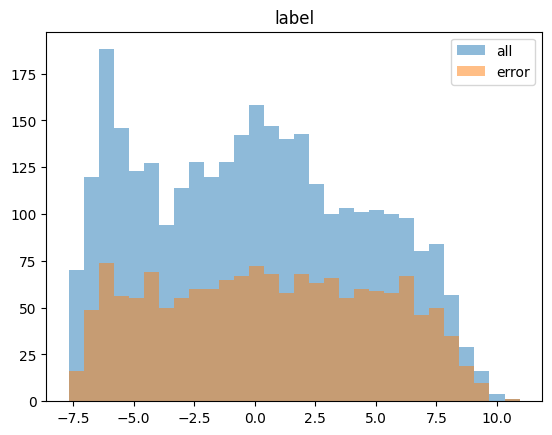

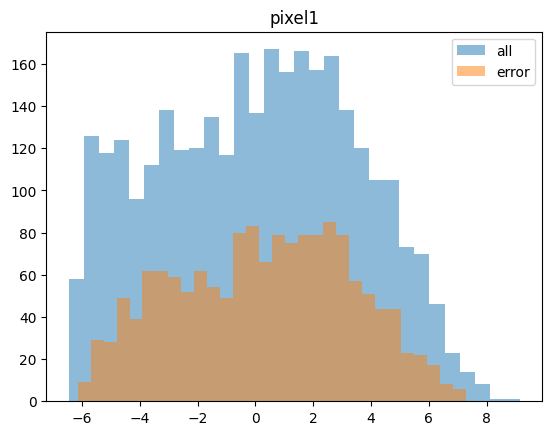

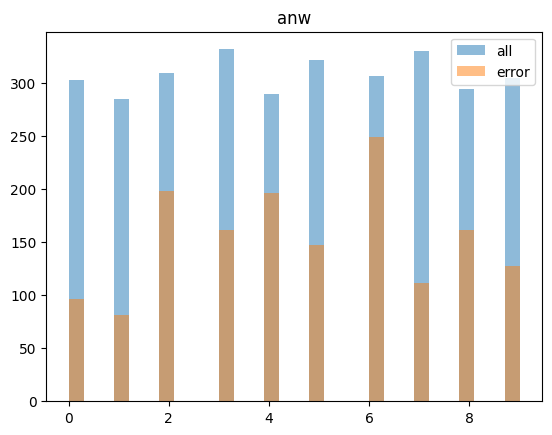

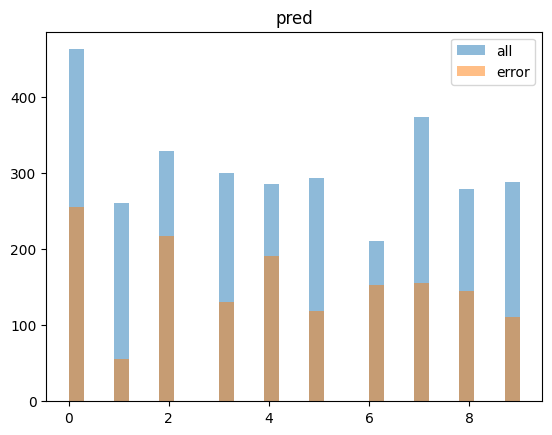

In [ ]:
import matplotlib.pyplot as plt

for i in range(0, len(df.columns)):
  col = df.columns[i]
  plt.title(col)
  plt.hist(df[col], bins=30, alpha = 0.5, label='all')
  plt.hist(df_error[col], bins=30, alpha = 0.5, label='error')
  plt.legend()
  plt.show()

In [ ]:
print(data.columns)

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [ ]:
print(data.label)

0        2
1        9
2        6
3        0
4        3
        ..
16089    6
16090    0
16091    1
16092    9
16093    0
Name: label, Length: 16094, dtype: int64


In [ ]:
print(data) #label은 0부터9까지 class정보, 28x28 2차원행렬에 0에서 27, 0에서 27 / pixel31은2번째행, 4번째열

       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
16089      6       0       0       0       0       0       0       0       2   
16090      0       0       0       0       0       0       0       0       0   
16091      1       0       0       0       0       0       0       0       0   
16092      9       0       0       0       0       0       0       0       0   
16093      0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776 

In [ ]:
# print(data.pixel31)
nan_count = data['pixel770'].isna().sum()
print(nan_count)

1
